In [1]:
import sys
from pathlib import Path

import os

import numpy as np

In [2]:
module_path = str(Path.cwd().parents[0].parents[0] / "methods")

if module_path not in sys.path:
    sys.path.append(module_path)

from dataloader import *
from plotCreator import *

In [3]:
def combineSum(array): #combine with sum
    combinedImage = array[0].copy()
    for i in range(len(array)):
        combinedImage = np.add(combinedImage, array[i])


    return combinedImage

In [4]:
def combineMax(array): #combine with max value
    combinedImage = array[0].copy()
    for i in range(len(array)):
            combinedImage = np.maximum(combinedImage, array[i])


    return combinedImage

In [5]:
data_path = str(Path.cwd().parents[0].parents[0] / "data" / "BH_n4_M10_res50_15000_events.h5")
bhArray = dataToArray(data_path)

In [6]:
sphdata_path = str(Path.cwd().parents[0].parents[0] / "data" / "PP13-Sphaleron-THR9-FRZ15-NB0-NSUBPALL_res50_15000_events.h5")
sphArray = dataToArray(sphdata_path)

In [7]:
bhcombinedSum = combineSum(bhArray)
sphcombinedSum = combineSum(sphArray)

In [8]:
bhcombinedMax = combineMax(bhArray)
sphcombinedMax = combineMax(sphArray)

In [9]:
print(bhcombinedSum.shape)
print(sphcombinedSum.shape)
print(bhcombinedMax.shape)
print(sphcombinedMax.shape)

(50, 50, 3)
(50, 50, 3)
(50, 50, 3)
(50, 50, 3)


In [10]:
from matplotlib import pyplot as plt

In [11]:
np.shape(np.reshape([x if x <= 607435.3 else 0.0 for x in bhcombinedSum[:,:,2:3].flatten()], (50, 50, 1)))

(50, 50, 1)

In [12]:
def imagePlot(ax, i, j, array, title):
    ax[i][j].set_ylabel(r"$\phi$ [radians]]", fontsize=12)
    ax[i][j].set_xlabel(r"$\eta$", fontsize=12)
    ax[i][j].imshow(array, cmap='gray', extent=[-5, 5, -np.pi, np.pi], aspect='auto')
    ax[i][j].set_title(title)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


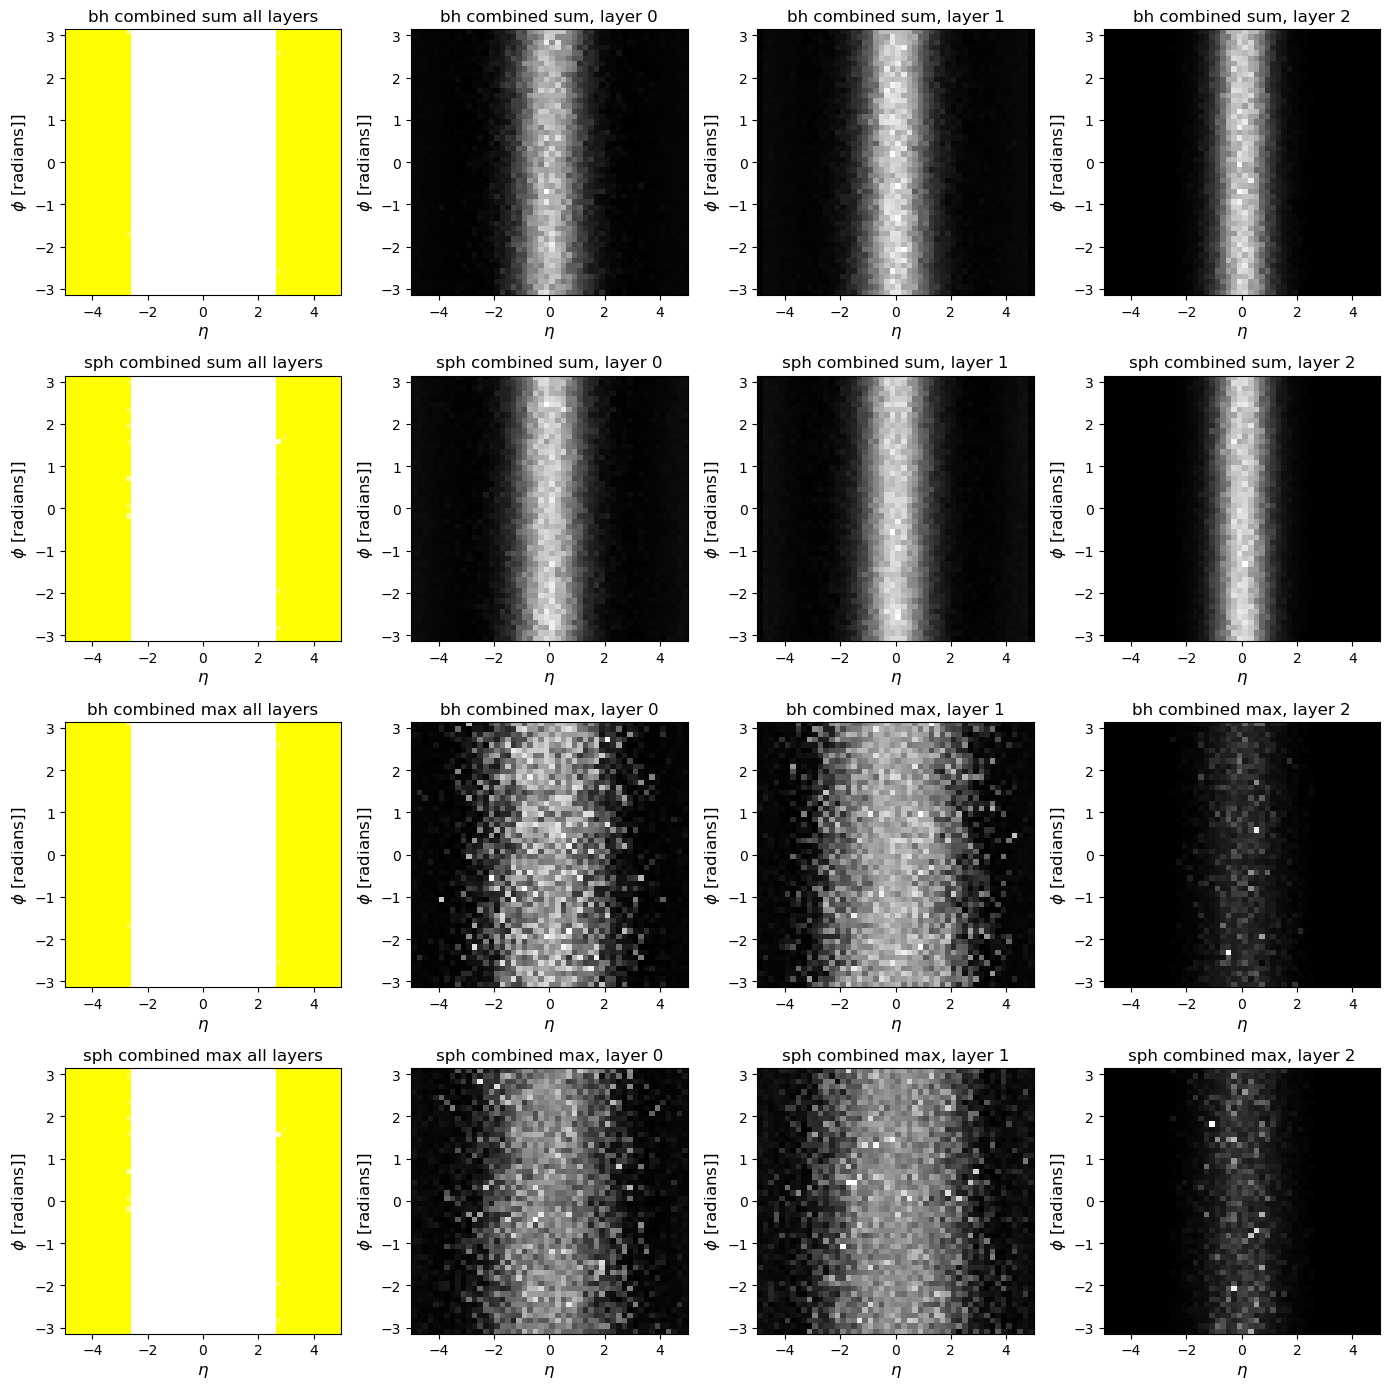

In [13]:
f, axarr = plt.subplots(4,4, figsize=(14,14))

imagePlot(axarr, 0, 0, bhcombinedSum, "bh combined sum all layers")

imagePlot(axarr, 1, 0, sphcombinedSum, "sph combined sum all layers")

imagePlot(axarr, 2, 0, bhcombinedMax, "bh combined max all layers")

imagePlot(axarr, 3, 0, sphcombinedMax, "sph combined max all layers")

for i in range(1,4):
    imagePlot(axarr, 0, i, bhcombinedSum[:,:,(i-1):i], "bh combined sum, layer " + str(i-1))

    imagePlot(axarr, 1, i, sphcombinedSum[:,:,(i-1):i], "sph combined sum, layer " + str(i-1))

    imagePlot(axarr, 2, i, bhcombinedMax[:,:,(i-1):i], "bh combined max, layer " + str(i-1))

    imagePlot(axarr, 3, i, sphcombinedMax[:,:,(i-1):i], "sph combined max, layer " + str(i-1))

f.tight_layout()
plt.show()

In [14]:
print(str(np.asarray(bhcombinedSum.flatten()).sum()) + " sum of bh sum")
print(str(np.asarray(sphcombinedSum.flatten()).sum()) + " sum of sph sum")
print(str(np.asarray(bhcombinedMax.flatten()).sum()) + " sum of bh max")
print(str(np.asarray(sphcombinedMax.flatten()).sum()) + " sum of sph max")

201709090.0 sum of bh sum
167311650.0 sum of sph sum
11502652.0 sum of bh max
7003139.0 sum of sph max


In [15]:
print(np.asarray(bhArray[0]).flatten().sum())
print(np.asarray(sphArray[0]).flatten().sum())

8669.259
9419.298


In [16]:
slice = np.zeros((50,50,1))
for i in range(50):
    for j in range(50):
        for rgb in range(3):
            slice[i][j] += bhcombinedSum[i][j][rgb]

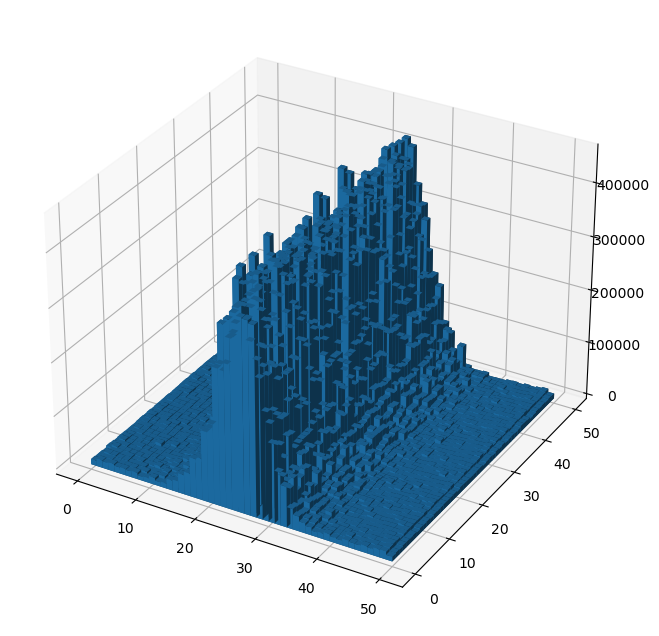

In [17]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(projection='3d')

x_data, y_data = np.meshgrid( np.arange(slice.shape[1]),
                              np.arange(slice.shape[0]) )


x_data = x_data.flatten()
y_data = y_data.flatten()
z_data = slice.flatten()

ax.bar3d( x_data,
          y_data,
          np.zeros(len(z_data)),
          1, 1, z_data)
plt.show()

In [18]:
bhList = []
for i in range(15_000):
    slice = np.ones((50,50,1))
    for j in range(50):
        for k in range(50):
            for rgb in range(3):
                if slice[j][k] < bhArray[i][j][k][rgb]:
                    slice[j][k] = bhArray[i][j][k][rgb]
    bhList.append(slice)

print(np.shape(bhList))

(15000, 50, 50, 1)


In [19]:
sphList = []
for i in range(15_000):
    slice = np.ones((50,50,1))
    for j in range(50):
        for k in range(50):
            for rgb in range(3):
                if slice[j][k] < sphArray[i][j][k][rgb]:
                    slice[j][k] = sphArray[i][j][k][rgb]
    sphList.append(slice)

print(np.shape(sphList))

(15000, 50, 50, 1)


In [20]:
bhListSum = [np.sum(x) for x in bhList]

In [21]:
sphListSum = [np.sum(x) for x in sphList]

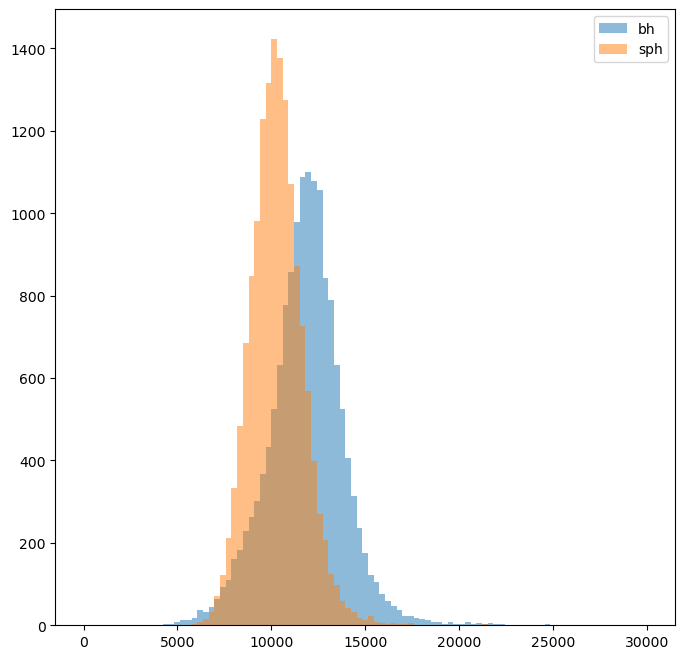

In [22]:
bins = np.linspace(-10, 30_000, 100)
plt.figure(figsize=(8,8))
plt.hist(bhListSum, bins, alpha=0.5, label='bh')
plt.hist(sphListSum, bins, alpha=0.5, label='sph')
plt.legend(loc='upper right')
plt.show()

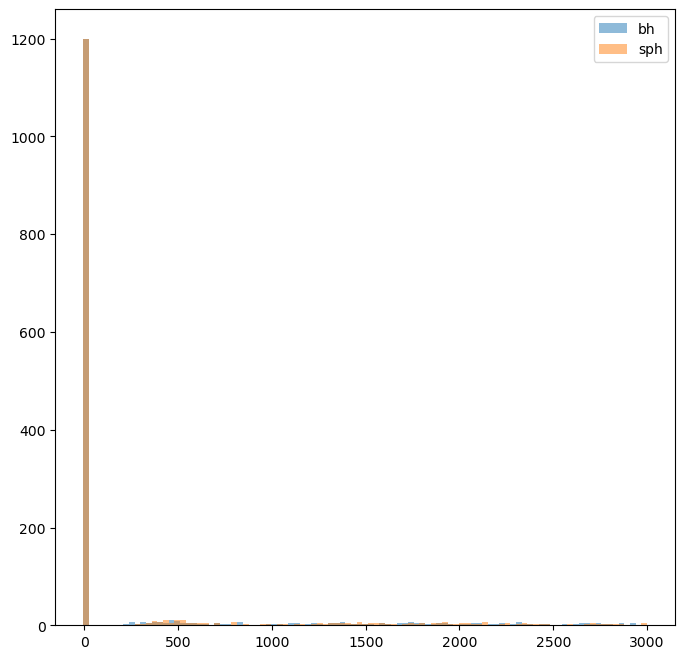

In [23]:
bins = np.linspace(-5, 3_000, 100)
plt.figure(figsize=(8,8))
plt.hist(bhcombinedSum[:,:,2:3].flatten(), bins, alpha=0.5, label='bh')
plt.hist(sphcombinedSum[:,:,2:3].flatten(), bins, alpha=0.5, label='sph')
plt.legend(loc='upper right')
plt.show()

In [24]:
print(np.sum([1 if x == 0.0 else 0 for x in sphcombinedSum[:,:,2:3].flatten()]))
print(np.sum([1 if x == 0.0 else 0 for x in bhcombinedSum[:,:,2:3].flatten()]))

1188
1196


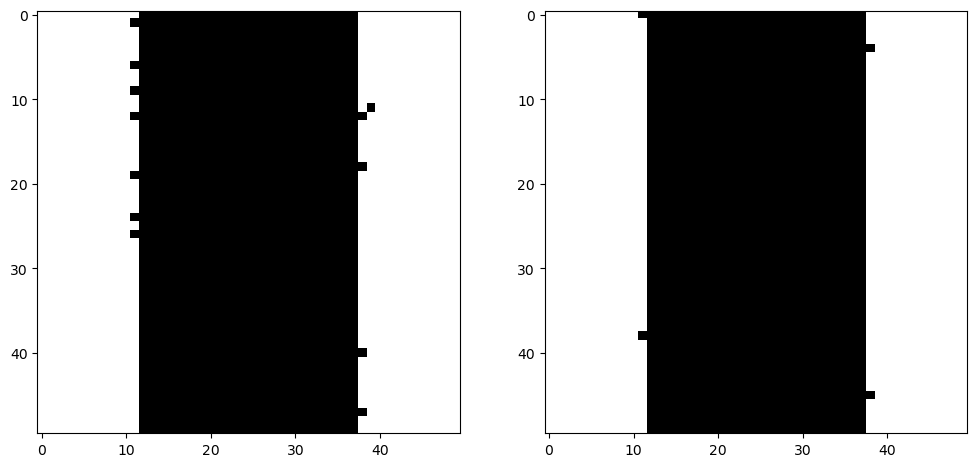

In [25]:
f, axarr = plt.subplots(1,2, figsize=(12,12))
axarr[0].imshow(np.reshape([1 if x == 0.0 else 0 for x in sphcombinedSum[:,:,2:3].flatten()],(50,50,1)),cmap='gray')
axarr[1].imshow(np.reshape([1 if x == 0.0 else 0 for x in bhcombinedSum[:,:,2:3].flatten()],(50,50,1)),cmap='gray')

In [26]:
def predbh(histo): #Returns true if bh
    a = histo[:,:,2:3].copy()
    #should be 50x50x1
    #check only valid area
    for j in range(50):
        for i in range(0,12):
            if a[j][i] != 0.0:
                # print(j)
                return True #bh
        
        for i in range(38,50):
            if a[j][i] != 0.0:
                # print(j)
                return True #bh
    return False #not bh

In [27]:
sumbh = 0
sumsph = 0
for i in range(15_000):
    if predbh(bhArray[i]):
        sumbh += 1
        print(i)
    if not predbh(sphArray[i]):
        sumsph += 1

print(sumbh, "number of true bh")
print(sumsph, "number of true sph")

150
566
1296
3970
4 number of true bh
14986 number of true sph


False
0.0


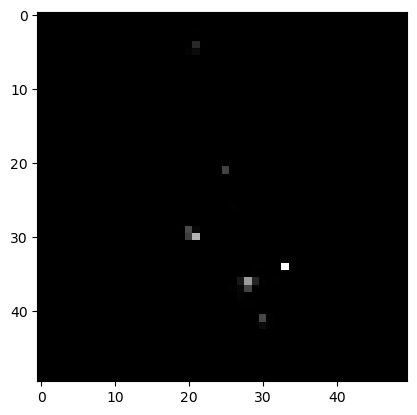

In [28]:
i = 0
print(predbh(bhArray[i]))
print(bhArray[i][3,15,2])
plt.imshow(bhArray[i][:,:,2:3], cmap='gray')

In [29]:
bhLayerList = []
for i in range(15_000):
    a = bhArray[i][:,:,2:3].flatten()
    bhLayerList.append(np.median(a[a != 0.0]))

print(np.shape(bhLayerList))
print(np.sum(bhLayerList))

(15000,)
25460.7


In [30]:
sphLayerList = []
for i in range(15_000):
    a = sphArray[i][:,:,2:3].flatten()
    sphLayerList.append(np.median(a[a != 0.0]))

print(np.shape(sphLayerList))
print(np.sum(sphLayerList))

(15000,)
25223.736


In [31]:
a = bhArray[1][:,:,2:3].flatten()
print(np.median(a[a != 0.0]))
b = sphArray[1][:,:,2:3].flatten()
print(np.median(b[b != 0.0]))

1.6216128
1.5142504


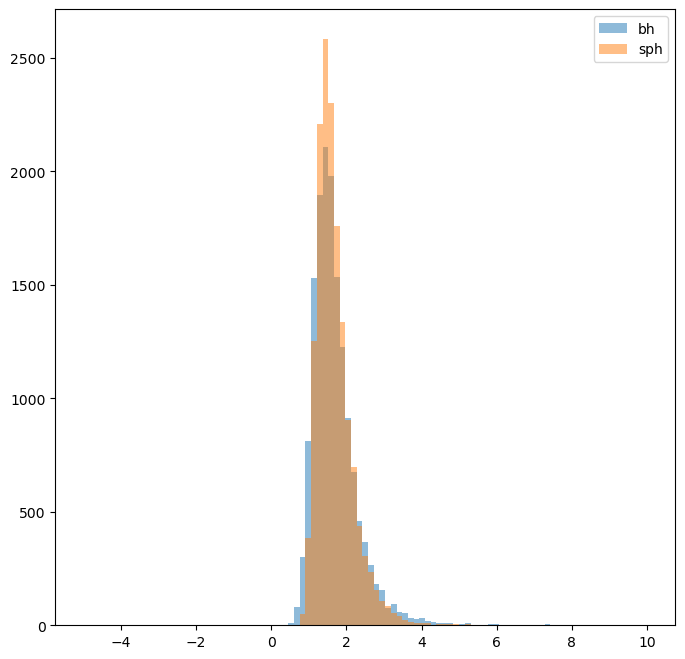

In [32]:
bins = np.linspace(-5, 10, 100)
plt.figure(figsize=(8,8))
plt.hist(bhLayerList, bins, alpha=0.5, label='bh')
plt.hist(sphLayerList, bins, alpha=0.5, label='sph')
plt.legend(loc='upper right')
plt.show()

In [33]:
print(np.median(bhcombinedSum[:,:,2:3]))
print(np.median(sphcombinedSum[:,:,2:3]))

478.05368
510.22488


In [34]:
print(np.sum(bhcombinedSum[:,:,2:3]))
print(np.sum(sphcombinedSum[:,:,2:3]))

62295190.0
54374616.0


In [35]:
print(np.max(bhcombinedSum[:,:,2:3]))
print(np.max(sphcombinedSum[:,:,2:3]))

187679.77
156643.48
